# PSU DS 200 
## Project Utility Jupyter Notebook 2
### November 19, 2019
### Updated November 22, 2019

### Instructor: John Yen

#### This Jupyter Notebook is intended to be used to construct Project Deliverables #2 for the Mini-project of DS 200. 

## The goal of this utility is to extract important features from a model so that you can combine them with the visualization of decision trees to do the following:
- To identify, among the very large number (hundreds) of features, what features are actually important for the model.
- By combining important features with the decision tree visualizations to interpret the role they play in the model (e.g., Does the appearance (or lack of appearance) of a word in a tweet more likely indicate a positive tweet for ...?)
- By comparing important features generated in different folds in a k-fold cross validation, we can not only identify multiple sets of important features, but also start to generate additional questions regarding these features and the class (e.g., positive/negative sentiment) you want to predict from a tweet.

#### Acknowledgement: The datascience module is developed by University of California Berkeley for its data 8 course.

#### Why extracting important features from a model is important?
- This helps people using the model to better understand the patterns/knowledge the model learns from the data.
- Being able to understand the knowledge captured in a model is the first step toward helping people to develop a suitable level of "trust" on the model.
- Comparing important features across different folds of a cross validation can also indicate whether the importance of the feature is "reliable".

#### How does sklearn help to identify important features
- The decision tree learning of sklearn module provides feature_importances, which is an array of "feature names" and associated "importance measure".  The importance measure of all features add up to 1.


In [1]:
!pip install datascience

     |████████████████████████████████| 51kB 272kB/s eta 0:00:011
     |████████████████████████████████| 92kB 564kB/s eta 0:00:01
     |████████████████████████████████| 13.0MB 8.7kB/s eta 0:00:01MB/s eta 0:00:01     |█████████████▉                  | 5.6MB 644kB/s eta 0:00:12��███████████▏                | 6.2MB 644kB/s eta 0:00:11     |████████████████                | 6.5MB 644kB/s eta 0:00:11     |████████████████▌               | 6.7MB 644kB/s eta 0:00:10     |█████████████████▏              | 7.0MB 644kB/s eta 0:00:10      | 7.6MB 644kB/s eta 0:00:09     |████████████████████████▎       | 9.9MB 485kB/s eta 0:00:07     |█████████████████████████       | 10.1MB 485kB/s eta 0:00:06     |█████████████████████████▌      | 10.4MB 234kB/s eta 0:00:12     |█████████████████████████▊      | 10.5MB 234kB/s eta 0:00:11     |██████████████████████████▍     | 10.8MB 969kB/s eta 0:00:03
     |████████████████████████████████| 215kB 5.0MB/s eta 0:00:01
  Using cached https://files.pythonhosted

Successfully built datascience docopt
  Found existing installation: Jinja2 2.8
    Uninstalling Jinja2-2.8:
      Successfully uninstalled Jinja2-2.8
  Found existing installation: matplotlib 2.1.1
    Uninstalling matplotlib-2.1.1:
      Successfully uninstalled matplotlib-2.1.1


In [2]:
import datascience
import numpy as np
import graphviz

from datascience import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 


from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.base import ClassifierMixin
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support

from graphviz import *

import pandas as pd
import numpy as np

from sklearn.externals import joblib

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:232: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
t1 = Table.read_table("LabelledTweets.csv", sep =',')
t1.show(10)

Text,Support
RT @kasserolees: Energy is the #1 contributer to climate ...,1
RT @edelman_barbara: @msnbc why don t you have a climate ...,1
RT @OtagoGrad: @anthonyfurey @OskieOckham The data doesn ...,0
The Dow just recorded its 3rd worst day ever. Think @rea ...,0
RT @SimonBanksHB: I am not going to rule out things base ...,0
RT @sydneyleemarco: nothing like an 80 degree october da ...,1
@MerlenesMemos @CNN It's not an act of god. Climate chan ...,1
RT @MikeLevinCA: When asked about climate change my GOP ...,0
RT @gq_jayq: Bet I got 11 years to run it up https://t.c ...,0
No they care about the oil billionaires,0


### The code below extract the "class label" from the CSV file to find out the total number of positive/supportive vs negative/non-supportive tweets in the labelled data set.
### If you use Climage Change tweets, the column label for the class label is 'Support'.
### If you use Airline Sentiment tweets, the column label for the class label is 'airline_sentiment' (as shown in Lab9)

In [4]:
t1_positive = t1.where('Support', are.equal_to(1))
t1_negative = t1.where('Support', are.equal_to(0))
t1_positive

Text,Support
RT @kasserolees: Energy is the #1 contributer to climate ...,1
RT @edelman_barbara: @msnbc why don t you have a climate ...,1
RT @sydneyleemarco: nothing like an 80 degree october da ...,1
@MerlenesMemos @CNN It's not an act of god. Climate chan ...,1
@BjornLomborg I think looking at climate change in terms ...,1
RT @KateRaworth: If you feel the dissonance between the ...,1
I cannot find one attribute that qualifies this man for ...,1
@Weinsteinlaw His base doesn t care. unaffiliated who su ...,1
RT @idea2go: The definition of #ClimateBreakdown from @G ...,1
sexy I don't die of natural causes at least a decade bef ...,1


In [5]:
t1_negative

Text,Support
RT @OtagoGrad: @anthonyfurey @OskieOckham The data doesn ...,0
The Dow just recorded its 3rd worst day ever. Think @rea ...,0
RT @SimonBanksHB: I am not going to rule out things base ...,0
RT @MikeLevinCA: When asked about climate change my GOP ...,0
RT @gq_jayq: Bet I got 11 years to run it up https://t.c ...,0
No they care about the oil billionaires,0
RT @cathmckenna: The best that science has to offer is t ...,0
RT @tumblindice1979: @elizabethforma @algore I love you ...,0
Global Warming and climate control is fake. GLOBAL WARMI ...,0
RT @HazelMonforton: Literally none of these things will ...,0


In [6]:
data = t1_positive.append(t1_negative)

In [7]:
data

Text,Support
RT @kasserolees: Energy is the #1 contributer to climate ...,1
RT @edelman_barbara: @msnbc why don t you have a climate ...,1
RT @sydneyleemarco: nothing like an 80 degree october da ...,1
@MerlenesMemos @CNN It's not an act of god. Climate chan ...,1
@BjornLomborg I think looking at climate change in terms ...,1
RT @KateRaworth: If you feel the dissonance between the ...,1
I cannot find one attribute that qualifies this man for ...,1
@Weinsteinlaw His base doesn t care. unaffiliated who su ...,1
RT @idea2go: The definition of #ClimateBreakdown from @G ...,1
sexy I don't die of natural causes at least a decade bef ...,1


In [8]:
# Use the data for constructing a Decision Tree Classifier
data_tagged_X= list(data['Text'])
data_tagged_Y= list(data['Support'])

print('tagged data input size', len(data_tagged_X))
print('tagged data target prediction size', len(data_tagged_Y))

tagged data input size 1283
tagged data target prediction size 1283


### Important Features for the Model with Best Max_depth

In Mini-project Deliverable #1, you have chosen a best value for max_depth of the decision tree model based on Stratified KFold Cross Validation.

In this Mini-project Deliverable, you will use the max_depth you chose from Deliverable #1 to construct decision trees and extract 10 most important features from your model.  If we only do this on one 
decision tree, we do not know how reliable is the feature importance result (just like we are not
as certain of the f1 value of testing data based on only one training-testing split).  

### Using Stratified KFold CV to Identify Reliably Important Features

Therefore, we can use Stratified KFold Cross Validation to construct k sets of important features, one
for each model constructed in each fold. This will provide us information on how reliable is the feature importance across the k fold.  For example, if a feature is always in the top 3 important feature in all
k folds, the high importance of the feature is quite reliable.  On the other hand, if a feature occurs in top 10 important feature only once among the k fold, the importance of the feautre is not as reliable as others that occur more often.

In [9]:
## Set the max_depth parameter value to be the one you chose for Mini-Project Deliverable #1

Best_max_depth= 5

### Stratified KFold Cross Validation
StratifiedKFold is a function in sklearn under the submodule model_selection.
#### Notice: In the beginning of this notebook, we import StratifiedKFold using the following python code:
    from sklearn.model_selection import StratifiedKFold
    
The n_splits parameter of StratifiedKFold indicates how many folds to use.  For example, 
n_splits=5 means Stratified 5-fold cross validation.


In [10]:
# Use Stratified Kfold Cross Validation so that
#   each fold contains the same ratio of positive/negative instances
k = 5
skf = StratifiedKFold(n_splits= k , random_state=1, shuffle= True)

In [11]:
### Set the range of max_depth to be around the 
low_max_depth = Best_max_depth - 1
high_max_depth = Best_max_depth + 1
training_performance_table = np.empty( [high_max_depth+1, k+1, 5] )
testing_performance_table = np.empty( [high_max_depth+1, k+1, 5] )

### Prepare the table to store total feature_importance (for each feature) across k folds; as well as
### the average, minimum, and maximum of feature_importance (for each feature) across k folds
feature_importance_k_fold_sum = np.empty( [high_max_depth+1, 1])
feature_importance_k_fold_avg = np.empty( [high_max_depth+1, 1])

### Create a CountVectorizer to map word features of all words in labelled data to index of word frequency matrix
### Note that this does NOT mean all tweets are used for training, it only means we create the columns of
### word frequency matrix using all words in the labelled tweets.  
count_vect = CountVectorizer(token_pattern='((?:([@#]|[0-9]|[a-z]|[A-Z])+))', analyzer= 'word', min_df=2)
x_all = list(data['Text'])
count_vect = count_vect.fit(x_all)


### Calculate Average, Minimum, and Maximum f1 score across folds 
The first dimension of training_performance_table refers to a specific max_depth value.
The second dimension of training_performance_table refers to the number of a fold (in a k-fold).
The third dimension of training_performance_table saves f1 score in index "3".

For example, the code below returns an array of f1_score for all k folds for max_depth set to 7.

In [12]:
feature_names = count_vect.get_feature_names()
### Turn feature_names into an array so that we can iterate over its elements
feature_names_array = np.asarray(feature_names)
WF_dimension = len(feature_names)

feature_importance_array = np.empty([k+1, WF_dimension])

### Extract only words/hashtags from feature_names into a list of words only
words_only_list = list()

for i in range(0,WF_dimension):
    # Extract the first word of each (word, character) pair in feature_names_array
    words_only_list.append(feature_names_array[i,0])

print(words_only_list)


['#1', '#1o5c', '#1point5', '#ableg', '#actonclimate', '#adb', '#alarmists', '#allwomen', '#alphaomegaenergy', '#antiscience', '#auspol', '#banksy', '#beccs', '#budget19', '#budget2019', '#ccs', '#cdnpoli', '#cities', '#cities4climate', '#climate', '#climateaction', '#climateactionnow', '#climatebreakdown', '#climatech', '#climatechan', '#climatechange', '#climatechangeisreal', '#climatecrisis', '#climateemergency', '#climateimpactsvic', '#conservatives', '#democrats', '#dems', '#deniers', '#earth', '#emissions', '#endcoal', '#energy', '#environment', '#environmentaljustice', '#epa', '#erierally', '#esg', '#florida', '#forests', '#fossilfuels', '#future', '#globalwarming', '#gop', '#gpconf', '#help', '#hilary', '#hoardingwealth', '#humanrights', '#huricanemichael', '#hurricane', '#hurricanemichael', '#hurricanemichael2018', '#idiots', '#innovation', '#innovators', '#ipcc', '#ipccreport', '#landsat', '#liberalplots', '#liberals', '#lnp', '#makeoilhistory', '#michael', '#nets', '#nswpol'

In [13]:
for depth in range(low_max_depth, high_max_depth+1):
    
    ### Prepare the feature_importance_array to store all feature importance weights for all k folds
    feature_names = count_vect.get_feature_names()
    WF_dimension = len(feature_names)
    feature_importance_array = np.empty([k+1, WF_dimension])
    
    fold = 1
    print("***** Maximum Depth of Decision Tree is ", depth, "******")
    for train_index, test_index in skf.split(data_tagged_X, data_tagged_Y):
        print("Fold Number:", fold)
     #   print("Training Data Index:", train_index)
 #       print("Testing Data Index:", test_index)  
        x_train= list(data.take(train_index)['Text'])     
    #    print("Training Data:", x_train)
        y_train= list(data.take(train_index)['Support'])
    #    print("Training Data Target Output:", y_train)
        x_test= list(data.take(test_index)['Text'])
    #    print("Testing Data:", x_test)
        y_test= list(data.take(test_index)['Support'])
    #   print("Testing Data Target Output:", y_test)
    
    #   We use transform here, rather than fit_transform, because the word frequency columns have been identified 
    #   earlier using fit
        X_word_vect = count_vect.transform(x_train)
        clf = tree.DecisionTreeClassifier(criterion='entropy', random_state = 100, max_depth=depth, \
                                  min_samples_leaf =2)
        clf.fit(X_word_vect, y_train)
        ### Use the model generated to predict for training data
        predicted_training_y = clf.predict(X_word_vect)
        train_p = metrics.precision_score(y_train, predicted_training_y)
        train_r = metrics.recall_score(y_train, predicted_training_y)
        train_f1= metrics.f1_score(y_train, predicted_training_y)
        training_performance_table[depth, fold, 0]=depth
        training_performance_table[depth, fold, 1]=train_p
        training_performance_table[depth, fold, 2]=train_r
        training_performance_table[depth, fold, 3]=train_f1
        print("Max depth is ", depth, "Prediction Performance for Training Data f1:", train_f1)
        
        ### Use the model generated to predict for testint data
        x_test_word_vect = count_vect.transform(x_test)
        predicted_testing_y = clf.predict(x_test_word_vect)
        
        test_p= metrics.precision_score(y_test, predicted_testing_y)
        test_r= metrics.recall_score(y_test, predicted_testing_y)
        test_f1 = metrics.f1_score(y_test, predicted_testing_y)
        testing_performance_table[depth, fold, 0]=depth
        testing_performance_table[depth, fold, 1]=test_p
        testing_performance_table[depth, fold, 2]= test_r
        testing_performance_table[depth, fold, 3]= test_f1
    #   print("Prediction Performance for Testing Data f1:", test_f1)  
    
        ### Store feature importance of the model as the i-th row in feature_importance_array  
        ### where i is the number of current fold     
        feature_imp = clf.feature_importances_
        ### We store feature importance of kth fold in fold-i row of feature_importance_array
        ### because the first row of the array has index 0.
        feature_importance_array[fold-1] = feature_imp
    #   print("Feature_importance_array:")
    #   print(feature_importance_array)
        
        ### Combine feature importance of this model and feature names to find top 20 important features
        feature_imp_names = zip(feature_imp, words_only_list)
        top_20_features = sorted(feature_imp_names, reverse=True)[:21]
        print("Top 20 important features for fold ", fold)
        for importance, name in top_20_features:
            print(name, importance)
            
        ### Store a visualization of the decision tree model
        dot_data= tree.export_graphviz(clf, out_file=None, feature_names=count_vect.get_feature_names())
        graph = graphviz.Source(dot_data)
        #### Create a string (to be used as the name of the file for storing the deicion tree visualization)
        #### We include fold number in the file name so that we can compare trees with the feature importance of different folds.
        graph_file_name = "ProjectDecisionTree_MaxDepth_" + str(depth) + "_Fold_" + str(fold)
        graph.render(graph_file_name)
        
        fold=fold+1 
    ### Convert Feature Importance Array for all k folds to a Panda DataFrame
    ### with column headings being features (words_only)
    feature_importance_k_fold_DF = pd.DataFrame(data=feature_importance_array, columns=words_only_list)
    
    ### Calculate the mean of feature importance for all words across all k folds
    feature_imp_k_fold_avg = np.mean(feature_importance_array, axis=0)
    # df2 = pd.DataFrame(data=feature_imp_k_fold_avg, columns=words_only_list)
    ### Add the average as the last row to the feature_importance_k_fold_DF
    feature_importance_k_fold_DF.loc[k] = feature_imp_k_fold_avg
    
    ### Sort the feature_importance_k_fold_DF by row k (i.e., average of feature importance)
    sorted_feature_importance_k_fold_DF=feature_importance_k_fold_DF.sort_values(by= k, axis='columns', ascending=False)
    print("Feature_importance_k_fold_DF sorted")
    print(sorted_feature_importance_k_fold_DF)
    ### Save the sorted feature importance DF as a CSV file 
    filename2 = "SortedFeatureImportanceKFoldMaxDepth_" + str(depth) + "_for_" + str(k) + "_Fold" + ".csv"
    sorted_feature_importance_k_fold_DF.to_csv(filename2)       
    
    ### Print top 30 features with highest average feature importance across all folds
    feature_imp_avg_words = zip(feature_imp_k_fold_avg, words_only_list)
    top_30_K_fold_features = sorted(feature_imp_avg_words, reverse=True)[:31]
    print("Top 30 important features across all folds")
    for importance, word in top_30_K_fold_features:
            print(word, importance)

***** Maximum Depth of Decision Tree is  4 ******
Fold Number: 1
Max depth is  4 Prediction Performance for Training Data f1: 0.7114427860696518
Top 20 important features for fold  1
#climatechange 0.23003162954882297
climate 0.18662000178020763
rt 0.11250136746239571
into 0.0762682729670306
levels 0.060226858718669216
to 0.056103966503640586
planet 0.055043949233287426
limiting 0.051401705604645936
on 0.0462404767682181
get 0.046034829952090114
weather 0.03534649857885986
an 0.032522739696784
it 0.011657703185347932
zero 0.0
zemlya 0.0
zealand 0.0
ysyqlia9sj 0.0
yourself 0.0
your 0.0
young 0.0
you 0.0
Fold Number: 2
Max depth is  4 Prediction Performance for Training Data f1: 0.7430769230769231
Top 20 important features for fold  2
climate 0.23848849117767035
#climatechange 0.18065124023400722
been 0.08435713451349287
on 0.07936991914758668
rt 0.06458403100122564
at 0.06419668748788479
in 0.06231976793107376
@tan123 0.04550860673586382
into 0.04436722079365463
to 0.0412716099627169
th

Feature_importance_k_fold_DF sorted
    climate  #climatechange        rt    change      into        in        on  \
0  0.151510        0.186754  0.091336  0.000000  0.061919  0.039050  0.037541   
1  0.169375        0.128299  0.045868  0.000000  0.031510  0.044260  0.056369   
2  0.199263        0.138480  0.107431  0.000000  0.047804  0.051881  0.000000   
3  0.260976        0.165705  0.114868  0.000000  0.000000  0.038678  0.000000   
4  0.000000        0.147860  0.112041  0.195079  0.047274  0.000000  0.033858   
5  0.130187        0.127850  0.078590  0.032513  0.031418  0.028978  0.021295   

       some    planet      take ...   ann  announced  annoy  another  answer  \
0  0.000000  0.044688  0.000000 ...   0.0        0.0    0.0      0.0     0.0   
1  0.032320  0.058492  0.000000 ...   0.0        0.0    0.0      0.0     0.0   
2  0.000000  0.000000  0.029399 ...   0.0        0.0    0.0      0.0     0.0   
3  0.038654  0.000000  0.032850 ...   0.0        0.0    0.0      0.0     0.0

In [14]:
f1_array=training_performance_table[Best_max_depth, 1:k+1:1, 3]

#### Numpy offers a convenient way to calculate the average, the minimum, and the maximum value of a given array:
    np.average returns the average of a given array
    np.amin returns the minimum value of a given array
    np.amax regturns the maximum value of a given array

In [15]:
np.average(f1_array)

0.7410273013784607

In [16]:
np.amin(training_performance_table[ Best_max_depth , 1:k+1:1, 3])

0.7152899824253076

In [17]:
np.amax(training_performance_table[ Best_max_depth , 1:k+1:1, 3])

0.7605633802816902

### We want to calculate the average performance across all folds for each max_depth so that we can compare them. 

In [18]:
cv_training_f1_summary = np.empty( [high_max_depth+1, 3])
cv_testing_f1_summary = np.empty( [high_max_depth+1, 3])
first_fold = 1
last_fold = 5+1
for depth in range(low_max_depth, high_max_depth+1):
    train_f1_array = training_performance_table[depth, first_fold:last_fold:1 , 3]
    cv_training_f1_summary[depth, 0] = np.average(train_f1_array)
    cv_training_f1_summary[depth, 1] = np.amin(train_f1_array)
    cv_training_f1_summary[depth, 2] = np.amax(train_f1_array)
    test_f1_array = testing_performance_table[depth, first_fold:last_fold:1, 3]
    cv_testing_f1_summary[depth, 0] = np.average(test_f1_array)
    cv_testing_f1_summary[depth, 1] = np.amin(test_f1_array)
    cv_testing_f1_summary[depth, 2] = np.amax(test_f1_array)

### We want to plot the average of f1 scores (across all k folds) for each max_depth, and compare the average of f1 scores for training data and testing data

In [19]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

In [20]:
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning )

In [21]:
depth=np.linspace(low_max_depth, high_max_depth, high_max_depth-low_max_depth+1)
print(depth)

[4. 5. 6.]


In [22]:
avg_f1_training = cv_training_f1_summary[low_max_depth:high_max_depth+1, 0]
min_f1_training = cv_training_f1_summary[low_max_depth:high_max_depth+1, 1]
avg_f1_testing = cv_testing_f1_summary[low_max_depth:high_max_depth+1, 0]
min_f1_testing = cv_testing_f1_summary[low_max_depth:high_max_depth+1, 1]

### The following code for plotting average f1 

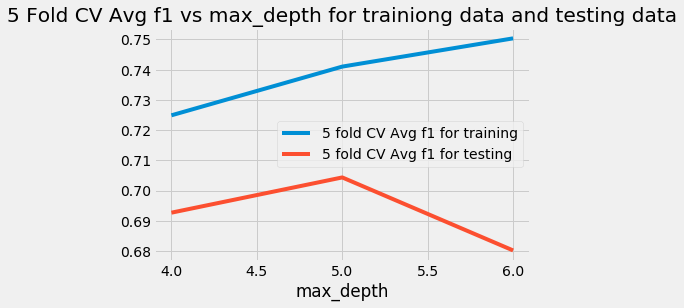

In [23]:



plt.plot(depth, avg_f1_training, label="5 fold CV Avg f1 for training")
plt.plot(depth, avg_f1_testing, label="5 fold CV Avg f1 for testing")
plt.xlabel('max_depth')
plt.title('5 Fold CV Avg f1 vs max_depth for trainiong data and testing data')
plt.legend()
plt.show()

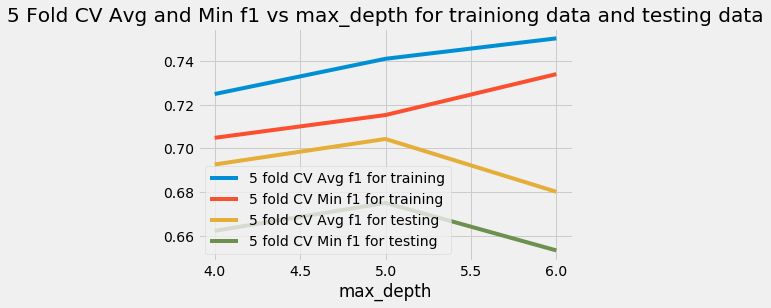

In [24]:
plt.plot(depth, avg_f1_training, label="5 fold CV Avg f1 for training")
plt.plot(depth, min_f1_training, label="5 fold CV Min f1 for training")
plt.plot(depth, avg_f1_testing, label="5 fold CV Avg f1 for testing")
plt.plot(depth, min_f1_testing, label="5 fold CV Min f1 for testing")
plt.xlabel('max_depth')
plt.title('5 Fold CV Avg and Min f1 vs max_depth for trainiong data and testing data')
plt.legend()
plt.show()